In [5]:
import sys
print(sys.executable)



/home/zeus/miniconda3/envs/cloudspace/bin/python


In [6]:
!pip install fastai  --quiet

^C
ERROR: Operation cancelled by user


In [ ]:
!conda install -c fastai fastai  --quiet




/home/zeus/miniconda3/lib/python3.10/site-packages/conda/base/context.py:969: FutureWarning: Adding 'defaults' to channel list implicitly. is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly via 'conda config --add channels <name>', e.g. 'conda config --add channels defaults'.
  deprecated.topic(
Channels:
 - fastai
 - defaults
Platform: linux-64
Solving environment: ...working... done

# All requested packages already installed.



In [ ]:
import fastai
print(fastai.__version__)

2.7.17


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


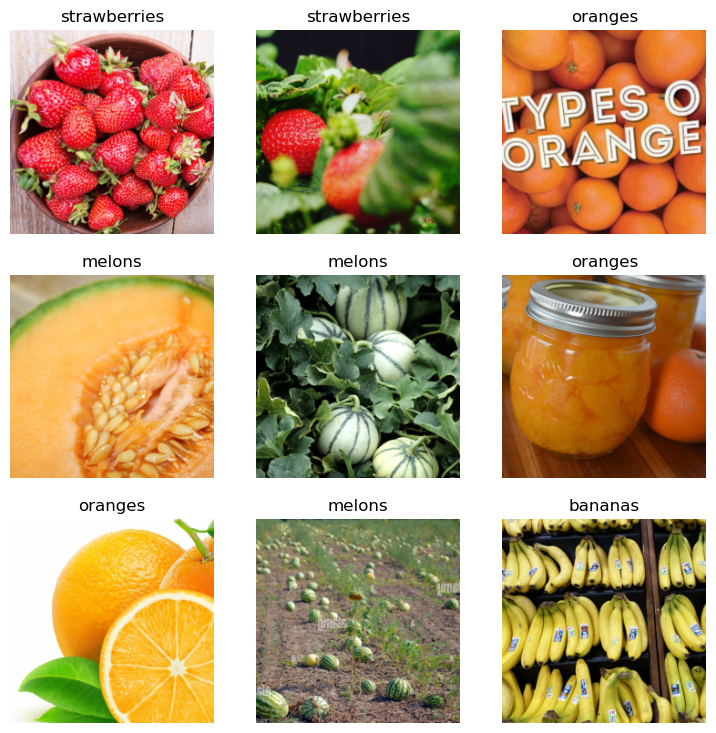

In [ ]:
from pathlib import Path  # Importujte Path z pathlib
from fastai.vision.all import *  # Importování všech potřebných komponent z fastai
# Zde je cesta k adresáři s obrázky
path = Path('/teamspace/studios/this_studio/images/train')

# Nastavení ImageDataLoaders
dls = ImageDataLoaders.from_folder(
    path,                 # Cesta k adresáři s tréninkovými daty
    train='.',            # Používáme celý adresář pro rozdělení dat
    valid_pct=0.2,        # 20% dat bude použito pro validaci
    seed=42,              # Nastavení semene pro replikovatelnost
    item_tfms=Resize(460),# Změna velikosti obrázků na 460x460 (nebo požadovanou velikost)
    batch_tfms=aug_transforms(size=224, min_scale=0.75), # Data augmentace 
    bs=64                 # Velikost dávky 64
)

# Zobrazení náhledů obrázků
dls.show_batch(max_n=9)


In [ ]:
import warnings

# to ignore the palette warnings
warnings.filterwarnings(
    "ignore",
    message="Palette images with Transparency expressed in bytes should be converted to RGBA images",
    category=UserWarning
)

In [ ]:
# TODO - you can change resnet18 to other architecture
# from timm import list_models
# list_models(pretrained=True)
from fastai.vision.all import *  # Importování všech potřebných komponent

# Nastavení modelu, můžete změnit na jinou architekturu, např. resnet34 nebo jinou
learn = vision_learner(dls, resnet18, metrics=error_rate)

# Trénování modelu
learn.fine_tune(4)  # Například trénování po dobu 4 epoch

epoch,train_loss,valid_loss,error_rate,time
0,1.595664,0.305108,0.129213,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.513055,0.257588,0.101124,01:17
1,0.398952,0.245362,0.106742,01:16
2,0.314610,0.228430,0.101124,01:12
3,0.247610,0.227888,0.084270,01:15


SuggestedLRs(valley=0.0002754228771664202)

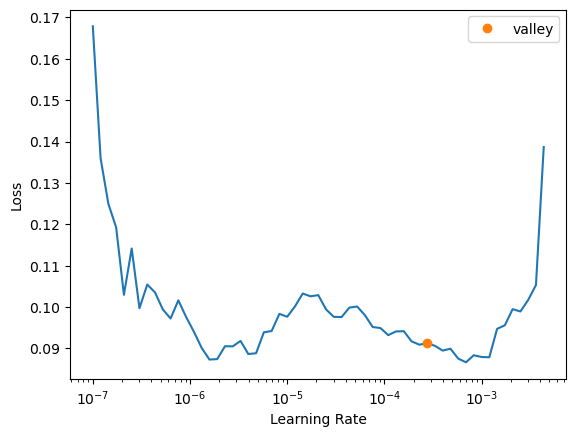

In [ ]:
learn.lr_find()
#SuggestedLRs(valley=0.0002754228771664202)

In [ ]:
# TODO
lr = 0.0002754228771664202 # set optimal learning rate here
epochs = 3 # set number of one-cycles for training, try to experiment a bit

In [ ]:
# TODO - you can change resnet18 to other architecture (same as above)
# Můžete změnit model resnet18 na jinou architekturu (např. resnet34, resnet50)
learn = vision_learner(dls, resnet34, metrics=error_rate)  # Používáme resnet34 místo resnet18

# Trénování modelu s optimálním learning rate
learn.fine_tune(epochs, lr)


epoch,train_loss,valid_loss,error_rate,time
0,2.215791,1.188095,0.516854,01:20


epoch,train_loss,valid_loss,error_rate,time
0,1.463637,0.774284,0.280899,01:36
1,1.247477,0.504641,0.185393,01:33
2,1.035232,0.475252,0.185393,01:33


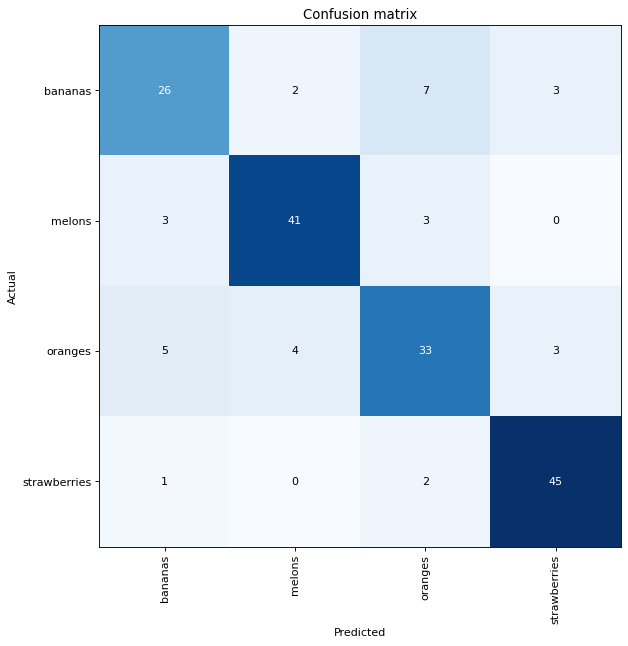

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=80)

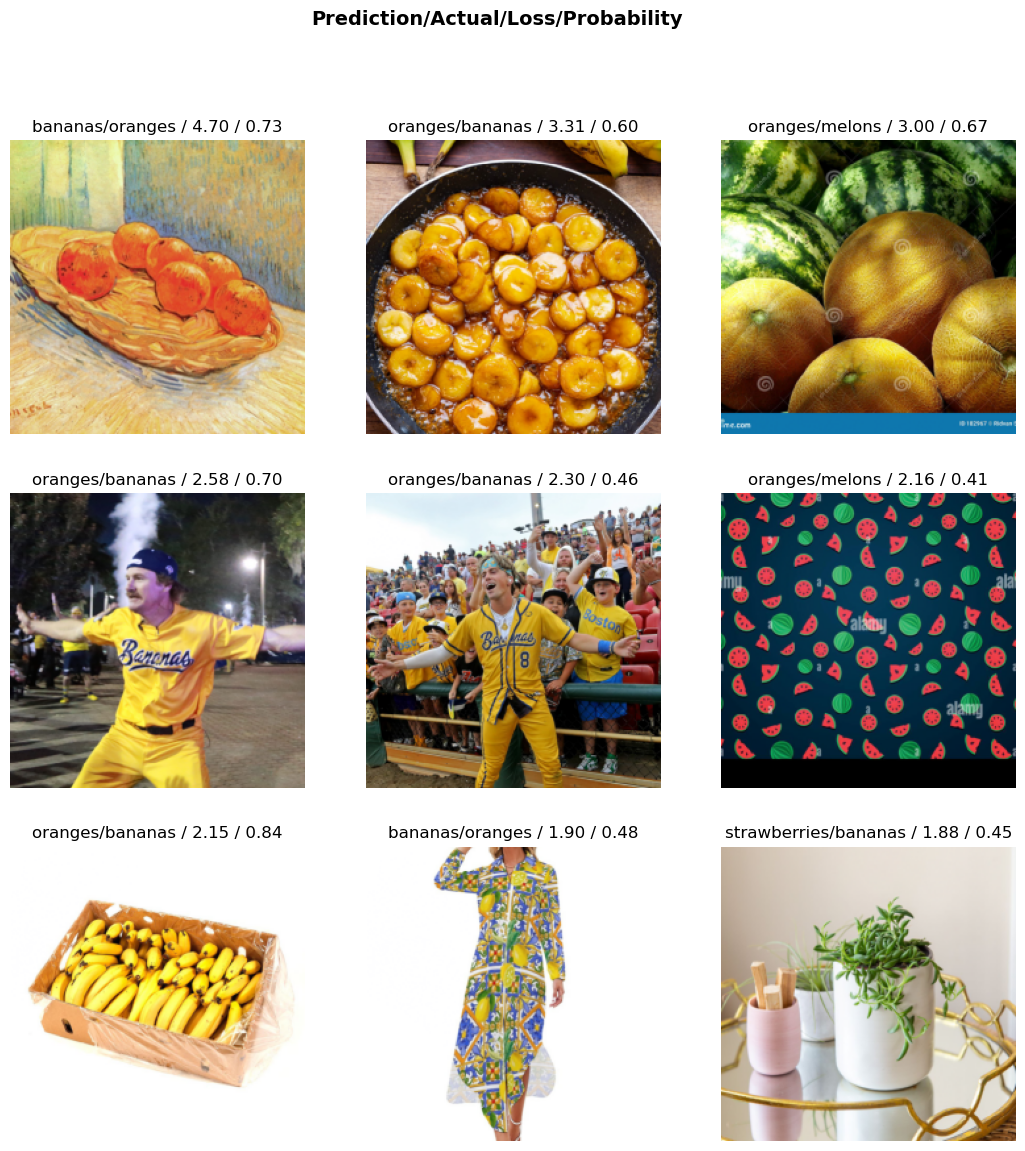

In [ ]:
interp.plot_top_losses(9, figsize=(13,13))

In [ ]:
from fastai.vision.widgets import *

# TODO - repeatedly run this and following cell for each category and split (train/valid)
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
print(len(cleaner.delete()))

11


In [ ]:
# Create a test DataLoader
test_path = Path('/teamspace/studios/this_studio/images/test') 
test_dl = learn.dls.test_dl(get_image_files(test_path))

In [ ]:
# Get predictions
preds, targets = learn.get_preds(dl=test_dl)
pred_labels = torch.argmax(preds, dim=1)

In [ ]:
# Get class names
class_names = learn.dls.vocab
# Convert predictions to class names
pred_class_names = [class_names[i] for i in pred_labels]
true_class_names = [Path(t).parent.name for t in test_dl.items]

In [ ]:
from statistics import mean

print("Test error rate:")
print(1 - mean([actual == predicted for actual, predicted in zip(true_class_names, pred_class_names)]))

Test error rate:
0.1504424778761062


In [ ]:
learn.export('model.pkl')
learn.export('/teamspace/studios/this_studio/model.pkl')

In [ ]:
!pwd

/teamspace/studios/this_studio


In [ ]:
!ls

01.ipynb  images		 img.zip  neuronka.ipynb
02.ipynb  images_train_test.zip  main.py
